In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('../Datasets/cases/Human_Resources_Analytics/HR_comma_sep.csv')
X = df.drop(['left'], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_prob = lr.predict_proba(X_test)
y_pred_prob


c:\Users\dai\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[0.61099181, 0.38900819],
       [0.61344312, 0.38655688],
       [0.5404661 , 0.4595339 ],
       ...,
       [0.94840852, 0.05159148],
       [0.9446712 , 0.0553288 ],
       [0.78286529, 0.21713471]], shape=(4499, 2))

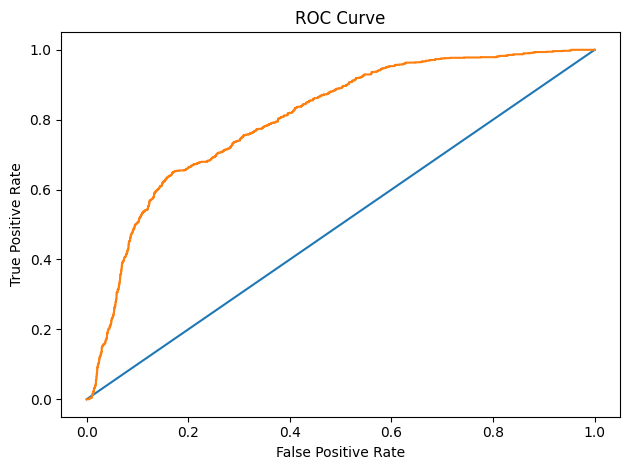

In [5]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.tight_layout()
plt.show()

In [7]:
solver = ['sag', 'newton-cg', 'newton-cholesky', 'lbfgs']
penalties = ['l2', None]
scores = []


for p in penalties:
    for s in solver:
        lr = LogisticRegression(solver=s, penalty=p, l1_ratio=0.5)
        lr.fit(X_train, y_train)
        y_pred = lr.predict_proba(X_test)
        scores.append([s, p, roc_auc_score(y_test, y_pred[:,1])])
    

df_scores = pd.DataFrame(scores, columns=['Solver', 'Penalty', 'roc score'])
df_scores.sort_values(by='roc score', ascending=False)

c:\Users\dai\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\dai\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\dai\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\dai\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\dai\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.

,Solver,Penalty,roc score
2,newton-cholesky,l2,0.809834
1,newton-cg,l2,0.809821
6,newton-cholesky,None,0.809681
5,newton-cg,None,0.809681
3,lbfgs,l2,0.804282
7,lbfgs,None,0.802909
4,sag,None,0.797296
0,sag,l2,0.797086


now doing with knn + standard scaler

In [13]:
scaler = StandardScaler()
xx = scaler.fit_transform(X_train)
xxtest = scaler.transform(X_test)

scores = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xx, y_train)
    y_pred = knn.predict_proba(xxtest)
    scores.append([i, roc_auc_score(y_test, y_pred[:,1])])
    

df_scores = pd.DataFrame(scores, columns=['Neighbors', 'roc score'])
df_scores.sort_values(by='roc score', ascending=False)

,Neighbors,roc score
7,8,0.971768
6,7,0.971562
8,9,0.971403
3,4,0.970791
9,10,0.970631
4,5,0.970184
5,6,0.969869
2,3,0.969816
1,2,0.969763
0,1,0.960576
